# Workflow
we will start with Data Collection first from Kaggle and as we have imported the required Data we shall then move on to EDA

During EDA(Exploratory Data Analytics) and this is a neccessary step towards a Machine Learning project since it helps with understanding the data and analyzing what models can be used to work on the data.

Then we move on to Data PreProcessing where we perform under sampling and over sampling.

Train Test Split - here we train and test the data
Then work with tree Models like random forest, xtree boost classifier, etc. as well as use cross validation.

Find the best trained model
Then send unknown data and predict of our required goal i.e to find out if a customer will be leaving or not.

Then we study the dataset and analyze what are the columns shown in it

now we download the required pytohn libraries for the prediction project
 do this by running these commands individually
NOTE: run each command only after the previous has stopped running.
Commands:

pip install pandas \n

pip install numpy 

pip install scikit-learn

pip install matplotlib 

pip install xgboost
after this restart the python  kernel being used in the notebook.>

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# from imblearn import SMOTE #for oversampling technique to build a uniformly distributed target class
import seaborn as sns
from sklearn.model_selection import train_test_split #from splitting data into train test and split
from imblearn.over_sampling import SMOTE #to solve class imbalance issues

# lets import few decision tree based models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [70]:
# now we load the csv data to a pandas DataFrame
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape #this shows the number of rows and columns we have in our DataSet and this is a decent number of of data we have for training a model

(7043, 21)

In [71]:
pd.set_option("display.max_columns", None) #this command ensures all columns are visible in the DataSet
df.head #this prints the first 5 columns of the dataset

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL        

In [72]:
df.info() #tells about all the different variables in the dataset and the data-type they contain

'null count is the number of missing values in the dataset'
"Non-Null Count is the number of values that aren't missing, here it is 7043 for all the columns that means no column is missing"

# in the 'TotalCharges' column the data is shown as object while when we look at the DataSet it is shown in float values so now we will have to conver its type and ensure uniformity incase any value is missing or different.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


"Non-Null Count is the number of values that aren't missing, here it is 7043 for all the columns that means no column is missing"

In [73]:
# dropping Customer ID column as this is not required for modelling.

df=df.drop(columns="customerID") #we have commented out this line because it has already been run and the customer id part has been dropped from the Dataset so running it again will only result in error
df.head() #to see DataSet that customerID column has been dropped from it.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
# now we take a look at names of individual columns in the dataset
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [75]:
# here we try to see individual columns and their contents by using unique feature with the name of the column
print(df["Partner"].unique())
print(df["OnlineSecurity"].unique())
print(df["gender"].unique())
#these are just examples that help us identify different unique values under a column and see if they fall under category type or number type, and this is possible because of unique function

['Yes' 'No']
['No' 'Yes' 'No internet service']
['Female' 'Male']


In [76]:
# lets now look at unique values of the dataset so we can see if the columns are categorical or numerical columns
for col in df.columns:
    print(col+"\n",df[col].unique())
    print("-"*50)
    "we have run this loop here in order to create an iteration of contents of each column individually through the csv file to see unique identifiers of each of them."
# in the output we can see each column's title and the unique values they contain

gender
 ['Female' 'Male']
--------------------------------------------------
SeniorCitizen
 [0 1]
--------------------------------------------------
Partner
 ['Yes' 'No']
--------------------------------------------------
Dependents
 ['No' 'Yes']
--------------------------------------------------
tenure
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService
 ['No' 'Yes']
--------------------------------------------------
MultipleLines
 ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService
 ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity
 ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup
 ['Yes' 'No' 'No internet service

In [77]:
''' # we will here try to print numerical feature list for monthly charger and total charges
numerical_features_list=["tenure", "MonthlyCharges", "TotalCharges"]
for col in df.columns:
    if col in numerical_features_list:
        print(col+'\n', df[col].unique())
        print("-"*50)
    else:
        continue'''

# but we don't actually want to print the unique values for these three columns, the true goal is to skip them because they contain numerical values that aren't needed for training the model and in order to do so we will use the following code
numerical_features_list=["tenure", "MonthlyCharges", "TotalCharges"]
for col in df.columns:
    if col not in numerical_features_list:
        print(col+'\n', df[col].unique())
        print("-"*50) #here we have skipped all the numerical columns for the DataFrame because we don't actually need it while training our model

gender
 ['Female' 'Male']
--------------------------------------------------
SeniorCitizen
 [0 1]
--------------------------------------------------
Partner
 ['Yes' 'No']
--------------------------------------------------
Dependents
 ['No' 'Yes']
--------------------------------------------------
PhoneService
 ['No' 'Yes']
--------------------------------------------------
MultipleLines
 ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService
 ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity
 ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup
 ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection
 ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport
 ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV
 ['No' 'Yes' '

In [78]:
df.isnull().sum() #this shows thesum of number of null values in the dataset column-wise

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [79]:
# we are expecting total charges value to be in float because thats what they are but it is being shown in object data-type, lets try to change that here

# df["TotalCharges"]=df["TotalCharges"].astype(float) #this shows us an error at first because there is data in the column that isn't float and has maybe been represented in some other form like blank space of maybe something else

len(df[df["TotalCharges"]==" "]) #here we can see there are 11 datasets in the dataframe that have blankspace representing null values in them. And we did this by filtering the datasets with blank spaces in them. with the given command


11

In [80]:
# lets replace the blank spaces
df["TotalCharges"]=df["TotalCharges"].replace({" ":"0.0"}) #first we will replace them with 0.0 as a string value 

# now lets convert the 0.0 string and rest of the numbers into float
df["TotalCharges"]=df["TotalCharges"].astype(float) #AND NOW IT WORKED!!!

df["TotalCharges"].unique #here we can see the dtype as float64 
#another way to see it would be df.info()
df.info() 
"Now for this dataframe our numerical columns are tenure, MonthlyCharges & TotalCharges."

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


'Now for this dataframe our numerical columns are tenure, MonthlyCharges & TotalCharges.'

In [81]:
# now an important task is to undestand the distribution of the target column
# to see if two classes are balanced properly or if one of those classes is more in volume

"Checking the class distribution of target column"
print(df["Churn"].value_counts())
# we can clearly see an imbalance in this particular dataset so we can't directly use it in our model ; so we either need to do upper-sampling or down-sampling first to increase the minority class or decrease the majority class. lets do that later bcz this helps us understand the data better.

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights from the analysis**
1. Removed the customer ID since it is no longer required for modelling
2. No missing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0.
4. Class imbalance identified in the target column.

3. Exploratory Data Analysis (EDA)

In [82]:
# lets do some EDA
# df.shape
# df.columns
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [83]:
# lets now take a look at the descriptive statistics of the dataset

df.describe() #this given information about the descriptive values of the data, i.e. mean, median, mode (and obviously it works only one the numerical DataType)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


***Numerical Feature Analysis***
1. Understand the distribution of numerical features

In [84]:
# let us now create a function to automate the process of plotting a desired column with respect to the dataset
def plot_historgam(df, column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")
    
    # let us also show mean and median for the plotted graph here
    col_mean=df[column_name].mean()
    col_median=df[column_name].median()
    
    #add vertical lines for mean and median
    plt.axvline(col_mean, color="red", linestyle="--", label="mean")
    plt.axvline(col_median, color="green", linestyle="-", label="median")

    plt.legend() #to show which line represents what part of the graph
    plt.show()

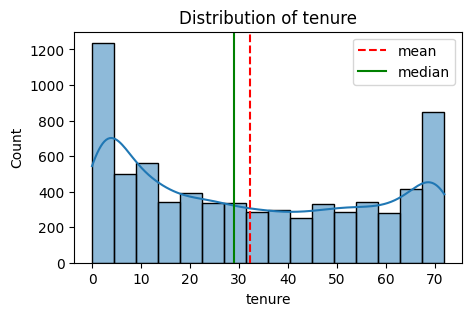

In [85]:
plot_historgam(df, "tenure") #plto fore tenure of the customers


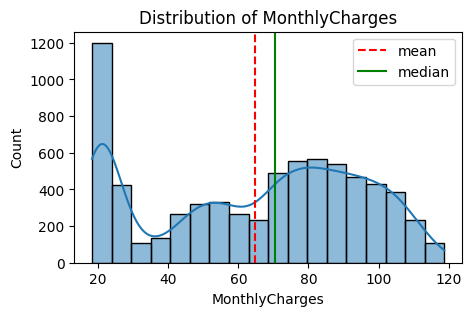

In [86]:
plot_historgam(df, "MonthlyCharges") #plot showing monthly charges of customers

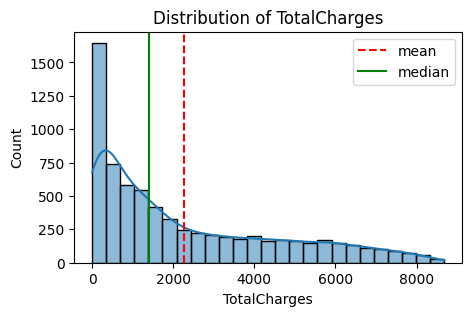

"this graph isn't uniformly distributed which shows us existence of outliers in the column data and this has to be taken care of since it is not optimal for creating a model."

In [87]:
plot_historgam(df, "TotalCharges") #plot for total charge distribution of customers

"this graph isn't uniformly distributed which shows us existence of outliers in the column data and this has to be taken care of since it is not optimal for creating a model."
# to take care of this we shall perform feature scaling that involves transforming this data to get a normal curve
# Logistic Regression or SVM Classification models especially require uniformity in their dataset before model training

***Box Plot for Numerical Features**

In [88]:
# lets create a function for box plot which is used to identify the outliers
def plot_boxplot(df, column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Distribution of {column_name}")
    plt.ylabel(column_name)
    plt.show()

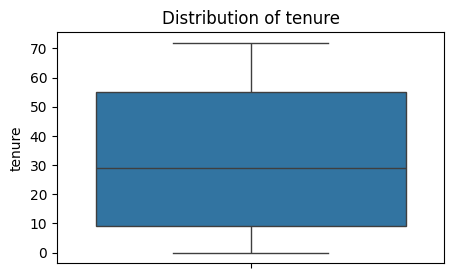

In [89]:
plot_boxplot(df, "tenure")